In [1]:
!nvidia-smi

Sun Aug 28 11:29:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

inputs from : https://www.kaggle.com/code/josepc/stable-diffusion-nsfw

In [2]:
!pip install diffusers==0.2.4
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 872.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 629.4 kB/s eta 0:00:00 0:00:01


You also need to accept the model license before downloading or using the weights. In this post we'll use model version `v1-4`, so you'll need to  visit [its card](https://huggingface.co/CompVis/stable-diffusion-v1-4), read the license and tick the checkbox if you agree. 

You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work. For more information on access tokens, please refer to [this section of the documentation](https://huggingface.co/docs/hub/security-tokens).

In [3]:
import matplotlib.pyplot as plt
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

hub_token = 'Your_token'
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", 
                                               revision="fp16", 
                                               torch_dtype=torch.float16, 
                                               use_auth_token=hub_token)  

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [4]:
pipe = pipe.to("cuda")

In [19]:
num_images = 4
prompt_text = "photo of an extremely cute alien fish as big as planets swimming in deep dark space, coral reefs, dream-like atmosphere, water, plants, peaceful, serenity, calm ocean, tansparent water, reefs, fish, coral, inner peace, awareness, silence, nature, evolution --version 3 --s 42000 --uplight --ar 4:3 --no text, blur"
prompt = [prompt_text] * num_images
torch.cuda.empty_cache()
torch.cuda.synchronize()
with autocast("cuda"):
    out = pipe(prompt)
    images = out["sample"]
    del out

0it [00:00, ?it/s]

# visualisation

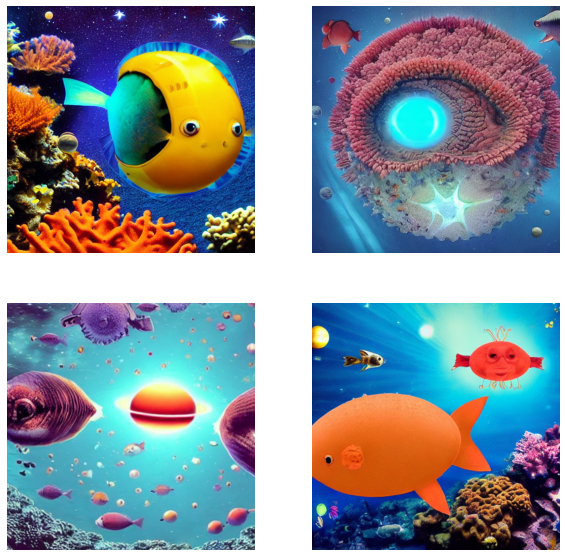

In [20]:
from math import sqrt, ceil

n = int(sqrt(num_images))
m = ceil(num_images/n)
fig, ax = plt.subplots(n, m, figsize=(10,10))

for i, image in enumerate(images):
    ax[i//n, i%m].imshow(image)
    ax[i//n, i%m].axis('off')
plt.show()

# save images

In [21]:
import os

output_name = 'output'

if not os.path.isdir('images'):
    os.mkdir('images')
for i, image in enumerate(images):
    image.save('images/'+output_name+str(i)+'.png')
!tar -czvf images.tar.gz images/

images/
images/output3.png
images/output2.png
images/output0.png
images/output1.png
